### Importing libraries

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Connect to the SQLite database

In [2]:
conn = sqlite3.connect('../tradesv3.sqlite')

# Function to execute SQL queries and return results as a DataFrame
def query_db(query):
    return pd.read_sql_query(query, conn)

### Get all tables in the database

In [3]:
tables = query_db("SELECT name FROM sqlite_master WHERE type='table';")

tables

,name
0,KeyValueStore
1,trades
2,pairlocks
3,trade_custom_data
4,orders


In [4]:
# Query the 'trades' table
trades = query_db("SELECT * FROM trades LIMIT 10;")

print("\nSample data from 'trades' table:")

trades


Sample data from 'trades' table:


,id,exchange,pair,base_currency,stake_currency,is_open,fee_open,fee_open_cost,fee_open_currency,fee_close,...,price_precision,precision_mode,precision_mode_price,contract_size,leverage,is_short,liquidation_price,interest_rate,funding_fees,funding_fee_running


In [5]:
# Get basic statistics of closed trades
closed_trades_stats = query_db("""
    SELECT 
        COUNT(*) as total_trades,
        AVG(close_profit) as avg_profit,
        MIN(close_profit) as min_profit,
        MAX(close_profit) as max_profit
    FROM trades
    WHERE is_open = 0;
""")
print("\nClosed trades statistics:")

closed_trades_stats


Closed trades statistics:


,total_trades,avg_profit,min_profit,max_profit
0,0,None,None,None


### Plot profit distribution

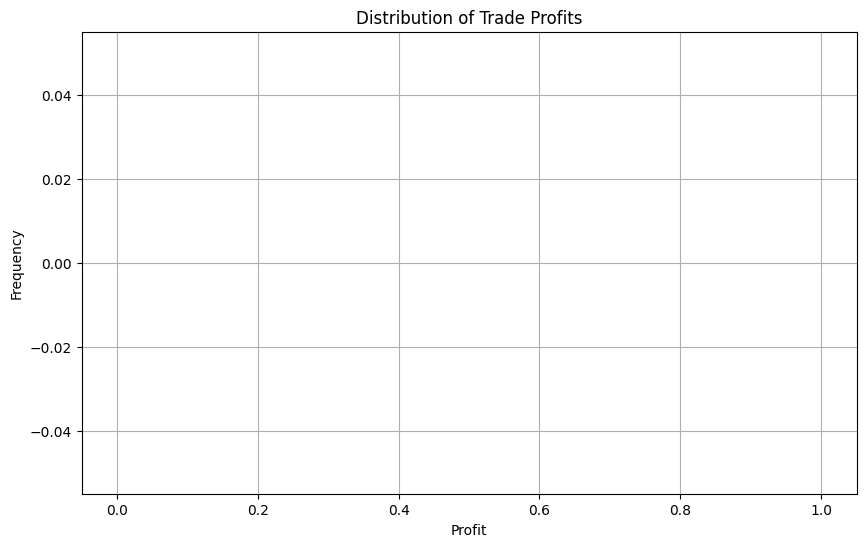

In [6]:

profit_distribution = query_db("SELECT close_profit FROM trades WHERE is_open = 0;")
plt.figure(figsize=(10, 6))
profit_distribution['close_profit'].hist(bins=50)
plt.title('Distribution of Trade Profits')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

### Close the database connection

In [ ]:

conn.close()